# Notebook 2: Analise de dados

In [4]:
# 1.1 Faturamento
# 1.1.1 Total
# 1.1.2 Por mes
# 1.1.3 Por dia da semana

# 1.2 Qual o tamanho da desigualdade dos dados
# 1.2.1 Clientes
# 1.2.2 Produtos e categorias

# 1.3 Recorrencia de clientes
# 1.3.1 Distrubuiçao por mes de clientes

# 1.4 Categorias para clientes
# 1.4.1 Clientes nichados por categoria

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#padroniza valores pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# lendo datasets

users = pd.read_csv("customers_1.csv")

prods = pd.read_csv("products_1.csv")

transfers = pd.read_csv("transactions_1.csv")

In [368]:
users.head(1)

,Customer_ID,SKU_Category,SKU,Average_Transaction_Amount,Total_Transactions,Total_Products,Total_Spent,First_Order_Date,Last_Order_Date
0,1,"{'0H2': 1, 'N8U': 1}","{'6OUVC': 1, 'CEBU8': 1}",16.29,1,2.00,16.29,2016-01-22,2016-01-22


In [369]:
prods.head(1)

,SKU_N,SKU,SKU_Category,Units_Sold,Total_Amount,Unit_Amount_Average
0,0,00GVC,1TS,2.00,35.36,17.68


In [370]:
transfers.head(1)

,Transaction_P_ID,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,2016-01-02,2547,1,X52,0EM7L,1.00,3.13


# 1.1 Vendas

## 1.1.1 Total

In [428]:
print('{0:,}$ de faturamento no ano em questao\n'.format(int(transfers.Sales_Amount.sum())))
print('{0:,} produtos vendidos\n'.format(int(prods.Units_Sold.sum())))
print('{0:,} carrinhos comprados\n'.format(len(transfers.Transaction_ID.unique())))
print('{0:,} clientes comprara na loja\n'.format(users.shape[0]))
print('{0:,}$ de faturamento por dia'.format(int(transfers.Sales_Amount.sum()/365)))

1,578,038$ de faturamento no ano em questao

195,624 produtos vendidos

64,682 carrinhos comprados

22,625 clientes comprara na loja

4,323$ de faturamento por dia


## 1.1.2 Por mes

In [15]:
transfers['Date'] = pd.to_datetime(transfers['Date'], format='%Y-%m-%d')

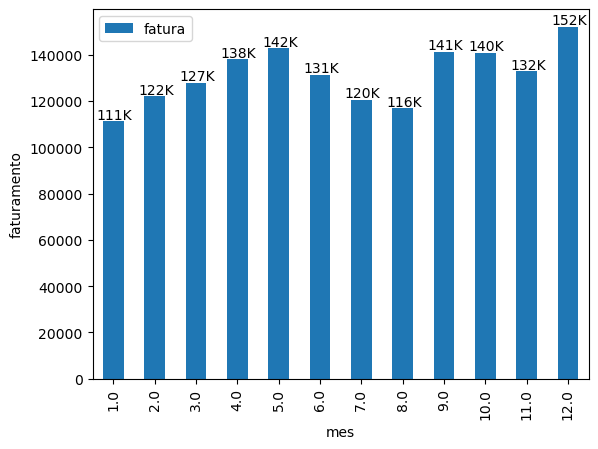

In [410]:
# 1.1 Pode-se observar uma distribuiçao normal ao redor do mes de maio, com crescimento maior a partir de setembro e auge em 
# ... dezembro, é de se manter na cabeça de que o crescimento de fim de ano é provavel que nao esteja, mas pode estar
# ... atrelado ao crescimento da loja em si, entao os numeros podem ser menos atenuantes em anos de estabilidade
faturamento_mes = []
for i in transfers.groupby('Date'):
    p1 = [i[0].month, i[1].Sales_Amount.sum()]
    faturamento_mes.append(p1)
fatm = pd.DataFrame(faturamento_mes)
fatm2 = fatm.groupby(0)
fatm3 = pd.DataFrame(columns=['mes', 'fatura'])
for i in fatm2:
    fatm3.loc[len(fatm3.index)] = [i[0], i[1][1].sum()]
fatm3.plot(kind='bar', x='mes', y='fatura')

xlocs=[i+1 for i in range(0,12)]

for i, v in enumerate(fatm3.fatura.to_list()):
    plt.text(xlocs[i] - 1.4, v + 1000, '{0:,}K'.format(int(v/1000)))

plt.ylabel("faturamento")
    
plt.show()

## 1.1.3 Por dia da semana

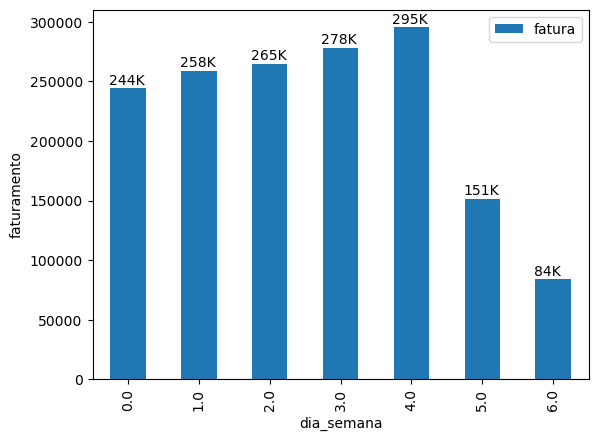

In [424]:
# 0 é segunda-feira
# 6 é domingo

# 1.1 Loja tem seu momento de tralho produtivo durante a semana, com leve crescimento indo de segunda a sexta
# 1.2 Sabado gerando metade do faturamento de sexta, e domingo pouco mais de metade do faturamento de sabado
faturamento_sem = []
for i in transfers.groupby('Date'):
    p1 = [i[0].dayofweek, i[1].Sales_Amount.sum()]
    faturamento_sem.append(p1)
fats = pd.DataFrame(faturamento_sem)
fats2 = fats.groupby(0)
fats3 = pd.DataFrame(columns=['dia_semana', 'fatura'])
for i in fats2:
    fats3.loc[len(fats3.index)] = [i[0], i[1][1].sum()]
    
fats3.plot(kind='bar', x='dia_semana', y='fatura')
    
xlocs2=[i+1 for i in range(0,7)]

for i, v in enumerate(fats3.fatura.to_list()):
    plt.text(xlocs2[i] - 1.27, v + 3000, '{0:,}K'.format(int(v/1000)))

plt.ylabel("faturamento")

plt.show()

# 1.2 Concentraçao dos dados

In [18]:
# 1.1 Entende-se concentraçao dos dados como, se foram feitas 100 compras naquele ano, quem foi o perfil que mais contribuiu 
# ... para essas compras e quanto. 
# 1.2 No objetivo de descobrir quanto é a importancia daquela loja para os clientes mais fieis e os produtos mais vendidos
# 1.3 Clientes mais fieis = Clientes que mais tiveram transaçoes na loja

In [43]:
# 1.1 Preparando funçao que recebe porcentagens do clientes mais fieis e retorna as informaçoes agregadas desses clientes
def dados_clientes_fieis(percentage):
    p100 = [100, 1577640, 64657, 195569, 24.40014228931129]
    pxU = int(users.shape[0]/100) * percentage
    spent = int(users.sort_values('Total_Transactions', ascending=False)[:pxU].Total_Spent.sum())
    transactions = users.sort_values('Total_Transactions', ascending=False)[:pxU].Total_Transactions.sum()
    products = int(users.sort_values('Total_Transactions', ascending=False)[:pxU].Total_Products.sum())
    average_ticket = spent / transactions
    spent_percentage = spent / (p100[1]/100)
    transactions_percentage = transactions / (p100[2]/100)
    products_percentage = products / (p100[3]/100)
    return [percentage, pxU, spent, transactions, products, average_ticket, spent_percentage, transactions_percentage, products_percentage]

In [44]:
# 1.1 Agrupando informaçoes de porcentagens relevantes em um dataframe
porcentagens = [1, 5, 10, 25, 50, 100]
df_porcentagens = pd.DataFrame(columns=['Percentage', 'Population', 'Spent', 'Transactions', 'Products', 'Average_Ticket', 'Spent_Percentage', 'Transactions_Percentage', 'Products_Percentage'])
for i in porcentagens:
    dadosf = dados_clientes_fieis(i)
    df_porcentagens.loc[len(df_porcentagens.index)] = dadosf
df_porcentagens

,Percentage,Population,Spent,Transactions,Products,Average_Ticket,Spent_Percentage,Transactions_Percentage,Products_Percentage
0,1.00,226.00,180059.00,6456.00,22721.00,27.89,11.41,9.98,11.62
1,5.00,1130.00,516641.00,18183.00,63520.00,28.41,32.75,28.12,32.48
2,10.00,2260.00,735385.00,26626.00,90875.00,27.62,46.61,41.18,46.47
3,25.00,5650.00,1080857.00,41027.00,132468.00,26.35,68.51,63.45,67.73
4,50.00,11300.00,1350842.00,53357.00,166377.00,25.32,85.62,82.52,85.07
5,100.00,22600.00,1577640.00,64657.00,195569.00,24.40,100.00,100.00,100.00


## 1.2.1 Clientes

In [22]:
# Funçao auxiliar parar printar formatado informaçoes da base acima
def printa(series):
    print('%.0f - %.0f%% dos clientes mais fieis compram %.2f%% dos produtos vendidos com ticket medio de %.2f$' % (series.Percentage, series.Percentage, series.Products_Percentage, series.Average_Ticket))
    print('... Eles representam %.2f%% de todo valor gasto na loja, fazendo %.2f%% de todas transaçoes' % (series.Spent_Percentage, series.Transactions_Percentage))

In [23]:
# 1.1 O que se observa é que principalmente os 5% mais fieis a loja geram muito valor, gerando 1/3 do faturamento total da loja
# 1.2 Quanto aos 50% que menos frequenta, esses geram apenas 15% da fatura da loja
# 1.3 Observa-se tambem que quanto mais fiel, maior é o ticket medio de uma transaçao
for i in df_porcentagens.iterrows():
    printa(i[1])
    print("")

1 - 1% dos clientes mais fieis compram 11.62% dos produtos vendidos com ticket medio de 27.89$
... Eles representam 11.41% de todo valor gasto na loja, fazendo 9.98% de todas transaçoes

5 - 5% dos clientes mais fieis compram 32.48% dos produtos vendidos com ticket medio de 28.41$
... Eles representam 32.75% de todo valor gasto na loja, fazendo 28.12% de todas transaçoes

10 - 10% dos clientes mais fieis compram 46.47% dos produtos vendidos com ticket medio de 27.62$
... Eles representam 46.61% de todo valor gasto na loja, fazendo 41.18% de todas transaçoes

25 - 25% dos clientes mais fieis compram 67.73% dos produtos vendidos com ticket medio de 26.35$
... Eles representam 68.51% de todo valor gasto na loja, fazendo 63.45% de todas transaçoes

50 - 50% dos clientes mais fieis compram 85.07% dos produtos vendidos com ticket medio de 25.32$
... Eles representam 85.62% de todo valor gasto na loja, fazendo 82.52% de todas transaçoes

100 - 100% dos clientes mais fieis compram 100.00% dos 

In [24]:
# Ainda sobre ticket medio a diferença dos clientes mais fieis para os de ocasiao
media1 = users.sort_values('Total_Transactions', ascending=False)[11300:].Total_Spent.sum() / users.sort_values('Total_Transactions', ascending=False)[11300:].Total_Transactions.sum()
media_1 = users.sort_values('Total_Transactions', ascending=False)[:11300].Total_Spent.sum() / users.sort_values('Total_Transactions', ascending=False)[:11300].Total_Transactions.sum()
print('Ticket Medio top50 clientes MENOS fieis: %.2f' % media1)
print('Ticket Medio top50 clientes MAIS fieis: %.2f' % media_1)

Ticket Medio top50 clientes MENOS fieis: 20.06
Ticket Medio top50 clientes MAIS fieis: 25.32


#### Usuarios que mais gastam mas nao compram mais de 5x na loja

In [129]:
# 1.1 Quando comparamos os clientes de ocasiao que mais gastam com os clientes que mais frequentam ao longo de um ano, os 
# ... clientes frequentadores, geram muito mais riqueza a loja

# 1p dos usuarios
p001users = int(users.shape[0]/100)
# total gasto pelos 1p com maior ticket medio ate 5 compras na loja
p001ots = int(users[users.Total_Transactions < 5].sort_values("Average_Transaction_Amount", ascending=False)[:p001users].Total_Spent.sum())
# total gasto pelos 10p com maior ticket medio ate 5 compras na loja
p010ots = int(users[users.Total_Transactions < 5].sort_values("Average_Transaction_Amount", ascending=False)[:p001users*10].Total_Spent.sum())
print("Usuarios com maior ticket medio que compram ate 5x:\n1%: {0:,}$".format(p001ots))
print("10%: {0:,}$".format(p010ots))

print("\nUsuarios que mais compram:\n1%: {0:,}$".format(df_porcentagens.iloc[0].Spent))
print("10%: {0:,}$".format(df_porcentagens.iloc[1].Spent))

Usuarios com maior ticket medio que compram ate 5x:
1%: 69,749$
10%: 295,023$

Usuarios que mais compram:
1%: 180,059.0$
10%: 516,641.0$


In [145]:
# Nao de se enganar que pessoas que compram ate 5x na loja ainda geram parte significante da receita por que sao extrema maioria
print('%.0f Clientes dos %.0f compram ate 5x na loja representando ' % (users[users.Total_Transactions < 5].shape[0], users.shape[0]), end="")
print("{0:,}$".format(int(users[users.Total_Transactions < 5].Total_Spent.sum())))
print('Enquanto isso apenas %.0f dos %.0f clientes compram mais de  5x na loja representando ' % (users[users.Total_Transactions > 5].shape[0], users.shape[0]), end="")
print("{0:,}$".format(int(users[users.Total_Transactions > 5].Total_Spent.sum())))

19105 Clientes dos 22625 compram ate 5x na loja representando 676,336$
Enquanto isso apenas 2689 dos 22625 clientes compram mais de  5x na loja representando 801,134$


## 1.2.2 Produtos e categorias

### Produtos que menos geram receita

In [46]:
p001spent = df_porcentagens.iloc[5].Spent / 100 # 1% da receita da loja
p050 = int(prods.shape[0] / 2) #50% dos produtos da loja - 2621
print('Os 50% produtos que menos geram receita, geram apenas {0:,}$ para a loja'.format(prods.sort_values('Total_Amount', ascending=False)[p050:].Total_Amount.sum()))
print('Que representa %.2f%% da receita da loja' % (prods.sort_values('Total_Amount', ascending=False)[2621:].Total_Amount.sum() / p001spent))

Os 50% produtos que menos geram receita, geram apenas 72,834.44$ para a loja
Que representa 4.62% da receita da loja


In [31]:
# esses produtos estao presente em praticamente todas as categorias 171/187, mas principalmente nas categorias abaxio
print(prods.sort_values('Total_Amount', ascending=False)[2621:].SKU_Category.value_counts()[:10]) 

LPF    90
XG4    80
TW8    79
SFC    73
JPI    72
Z4O    59
LSD    57
R6E    54
52T    54
DJI    54
Name: SKU_Category, dtype: int64


In [32]:
print(prods.sort_values('Total_Amount', ascending=False)[2621:].SKU_Category.value_counts().shape[0])
print(prods.SKU_Category.value_counts().shape[0])

171
187


In [23]:
# E sao equivalentes a menos de 10% dos produtos vendidos. Alem de nao gerar receita nao sao comprados <-->
# Outra maneira de interpretar seria que nao geram receita por que nao sao comprados <-->
print('{0:,} unidades vendidas desses produtos'.format(int(prods.sort_values('Total_Amount', ascending=False)[2621:].Units_Sold.sum())))
print('{0:,} produtos vendidos ao total'.format(int(prods.Units_Sold.sum())))

18,684 unidades vendidas desses produtos
195,624 produtos vendidos ao total


In [30]:
# esses produtos sao vendidos por uma media de menos de 4 reais, ou seja produtos baratos que mesmo assim nao sao tao cobiçados
print('Media de preço desses produtos(que foram vendidos) %.2f$' % (prods.sort_values('Total_Amount', ascending=False)[2621:].Total_Amount.sum() / prods.sort_values('Total_Amount', ascending=False)[2621:].Units_Sold.sum()))

Media de preço desses produtos(que foram vendidos) 3.90$


In [35]:
# Existem casos de produtos mais caros tambem, que acabam apenas por nao serem vendidos o suficiente para gerar receita
prods.sort_values('Total_Amount', ascending=False)[2621:].sort_values('Unit_Amount_Average', ascending=False)[:5]

,SKU_N,SKU,SKU_Category,Units_Sold,Total_Amount,Unit_Amount_Average
1935,1935,D0APX,ZJG,0.10,69.38,693.80
4417,4417,U5KIY,J4R,0.60,60.96,101.60
4359,4359,TOOXO,SJS,1.00,76.57,76.57
1683,1683,BEFRB,PHK,1.00,75.51,75.51
2119,2119,EA9XC,10Y,1.00,74.88,74.88


In [36]:
# Porem entendendo o problema de negocio, a loja nao oferece muitos produtos caros, e os oferecidos sao vendidos pouco em geral
prods.sort_values('Unit_Amount_Average', ascending=False)[:10]

,SKU_N,SKU,SKU_Category,Units_Sold,Total_Amount,Unit_Amount_Average
1935,1935,D0APX,ZJG,0.10,69.38,693.80
5136,5136,Z8IA4,ZJG,0.20,117.00,585.00
1427,1427,9KUFC,XG4,4.00,1218.12,304.53
2096,2096,E3T4K,06Z,5.00,1521.93,304.39
556,556,3NCL3,6BZ,13.00,3793.51,291.81
2718,2718,IH9J2,6BZ,5.66,1651.63,291.81
2696,2696,ID731,PHK,1.00,269.70,269.70
639,639,4AJLB,06Z,8.00,2091.85,261.48
1750,1750,BR7EP,PBV,2.00,505.59,252.79
631,631,4891R,1EO,1.00,249.56,249.56


#### Produtos vendidos cortados

In [37]:
# Interessante e dificil de entender tambem sao esses produtos que sao vendidos fracionados
prods.sort_values("Units_Sold", ascending=True)[:15]

,SKU_N,SKU,SKU_Category,Units_Sold,Total_Amount,Unit_Amount_Average
1935,1935,D0APX,ZJG,0.10,69.38,693.80
5136,5136,Z8IA4,ZJG,0.20,117.00,585.00
3183,3183,LJSFV,H1H,0.30,1.02,3.40
4916,4916,XMHTE,PBV,0.33,12.59,38.15
4955,4955,XY1DR,PBV,0.33,9.98,30.24
69,69,0FWL7,SIM,0.50,14.10,28.20
4417,4417,U5KIY,J4R,0.60,60.96,101.60
967,967,6GM39,PBV,0.67,29.70,44.33
1398,1398,9DJOL,ARZ,0.70,22.59,32.27
5160,5160,ZEN7K,PBV,0.99,20.05,20.25


### Produtos pouco vendidos

In [38]:
# Podemos ver que praticamente 50% dos produtos da loja sao vendidos menos de 10 unidades anuais
prods[prods['Units_Sold'] < 10]

,SKU_N,SKU,SKU_Category,Units_Sold,Total_Amount,Unit_Amount_Average
0,0,00GVC,1TS,2.00,35.36,17.68
4,4,01IQT,Z4O,7.00,9.22,1.32
7,7,01XVY,TW8,1.00,1.46,1.46
8,8,029WA,J4R,2.00,10.06,5.03
10,10,03CPI,FEW,5.00,81.36,16.27
...,...,...,...,...,...,...
5235,5235,ZY9N9,1EO,5.00,251.09,50.22
5237,5237,ZZ2AO,52T,1.00,24.38,24.38
5238,5238,ZZDW7,GVG,2.00,48.37,24.18
5240,5240,ZZNC5,LPF,1.00,10.79,10.79


In [35]:
print('total de produtos', prods.shape[0])
print('produtos com menos de 10 vendas anuais', prods[prods['Units_Sold'] < 10].shape[0])

total de produtos 5242
produtos com menos de 10 vendas anuais 2758


In [40]:
# Os mesmos acabam gerando praticamente 10% de receita, e devem existir muitos overlaps entre eles e os que menos arrecadam
print('{0:,}$ de receita'.format(prods[prods['Units_Sold'] < 10].Total_Amount.sum()))

159,407.88$ de receita


In [40]:
# Porem existem algumas exceçoes que geram boa quantidade de dinheiro anual a loja
prods[prods['Units_Sold'] < 10].sort_values('Total_Amount', ascending=False)[:10]

,SKU_N,SKU,SKU_Category,Units_Sold,Total_Amount,Unit_Amount_Average
639,639,4AJLB,06Z,8.00,2091.85,261.48
2718,2718,IH9J2,6BZ,5.66,1651.63,291.81
2096,2096,E3T4K,06Z,5.00,1521.93,304.39
4183,4183,SGGBX,V9H,9.00,1420.29,157.81
1427,1427,9KUFC,XG4,4.00,1218.12,304.53
2588,2588,HOJTH,A38,5.00,1090.85,218.17
1465,1465,9V7U9,PBV,8.00,1036.32,129.54
3671,3671,OXKQ8,SJS,5.00,906.97,181.39
5025,5025,YHAK7,A38,6.00,816.24,136.04
2982,2982,KCKVE,SJS,4.00,815.36,203.84


### Produtos mais vendidos 

In [41]:
# 1.1 A esse ponto ja deu a entender que o nosso negocio é um que tem suas vendas focalizadas em compras de produtos baratos, 
# ... assim como podemos ver analisandos os produtos mais vendidos e seus preços
prods.sort_values('Units_Sold', ascending=False)[:10]

,SKU_N,SKU,SKU_Category,Units_Sold,Total_Amount,Unit_Amount_Average
1859,1859,CKDW0,H8O,5769.20,235.88,0.04
4302,4302,TD3DD,JI5,3786.00,1039.12,0.27
4504,4504,UNJKW,N8U,2179.00,4526.28,2.08
2134,2134,EEI1Q,JI5,1568.00,515.37,0.33
3370,3370,MXKDP,JI5,1252.00,313.08,0.25
2541,2541,H8P2L,JI5,1118.00,306.23,0.27
410,410,2SVKS,U5F,1113.00,2460.49,2.21
1929,1929,CYRX4,JI5,1071.00,295.06,0.28
4692,4692,W1ZMG,A38,1033.00,3986.37,3.86
1812,1812,C6TXL,NTA,1027.00,4621.50,4.50


### Produtos que geram mais receita

In [42]:
# 1.1 Porem nao sao os produtos mais vendidos que geram maior receita, como podemos ver nos produtos abaixo que geram mais 
# ... dinheiro ao comercio, onde nao se repete um item do top10 mais vendidos no top10 que geram mais receita, que ainda nao sao
# ... produtos caros(*dificil dizer isso por falta de informaçao da moeda utilizada, mas que provavelmente é o caso), mas de 
# ... valor medio
prods.sort_values('Total_Amount', ascending=False)[:10]

,SKU_N,SKU,SKU_Category,Units_Sold,Total_Amount,Unit_Amount_Average
606,606,3YDVF,6BZ,926.00,29419.35,31.77
3178,3178,LJ26I,9ZX,632.00,13571.45,21.47
2752,2752,IRQZ4,LDZ,321.00,11681.63,36.39
2071,2071,DWJC4,OQA,823.00,10592.09,12.87
621,621,44RUE,LDZ,218.00,8942.63,41.02
4716,4716,W6RZ8,D6J,126.00,8561.70,67.95
1654,1654,B87MU,9ZX,325.00,8183.89,25.18
3373,3373,MYDIB,6BZ,86.00,7933.95,92.26
1771,1771,BW8YX,OXH,44.00,7822.52,177.78
3690,3690,P35XJ,6BZ,57.00,7759.64,136.13


In [48]:
print(prods.shape)
print(int(prods.shape[0]/100))

(5242, 6)
52


In [44]:
# 52 é o numero equivalente a 1% dos produtos da loja
top1_prods_receita = prods.sort_values('Total_Amount', ascending=False)[:52].Total_Amount.sum()
top10_prods_receita = prods.sort_values('Total_Amount', ascending=False)[:520].Total_Amount.sum()
top1_receita = df_porcentagens.iloc[5].Spent / 100
receita_p = top1_prods_receita / top1_receita
receita_p10 = top10_prods_receita / top1_receita
print("O top1%% produtos mais vendidos equivalem a  %.2f da receita daquele ano" % (receita_p))
print("O top10%% produtos mais vendidos equivalem a  %.2f da receita daquele ano" % (receita_p10))

O top1% produtos mais vendidos equivalem a  20.46 da receita daquele ano
O top10% produtos mais vendidos equivalem a  62.25 da receita daquele ano


### Perfil dos produtos mais que mais geram receita

In [45]:
# Essas sao as categorias que mais tem produtos que geram receita alta
previous_list_categories_most_money = prods.sort_values('Total_Amount', ascending=False)[:520].SKU_Category.value_counts()[:15].index
prods.sort_values('Total_Amount', ascending=False)[:520].SKU_Category.value_counts()[:15]

SJS    30
LPF    29
6BZ    27
N8U    22
01F    18
1EO    18
OXH    17
Q4N    15
IEV    15
FEW    14
U5F    12
0H2    12
R6E    11
V9H    11
FU5    11
Name: SKU_Category, dtype: int64

In [46]:
# 1.1 Quando na verdade sao essas sao as categorias que mais geram receita a loja(assumindo que tenham seus lucros proporcionais 
# ... por produto)
list_grps = []
for i in prods.groupby('SKU_Category'):
    list_grps.append([i[1].Total_Amount.sum(), i[0]])
list_categories_most_money = pd.DataFrame(list_grps, columns=['total', 'category']).sort_values('total', ascending=False)[:15].category.to_list()
frame_category_amount = pd.DataFrame(list_grps, columns=['total', 'category']).sort_values('total', ascending=False)
frame_category_amount[:15]

,total,category
30,114061.33,6BZ
155,85142.31,SJS
106,84921.91,LPF
131,54470.16,OXH
119,49119.55,N8U
41,42629.31,9ZX
0,38029.87,01F
91,37618.22,IEV
38,35528.14,8HU
148,34784.59,R6E


In [47]:
# Temos overlapping de categorias em 12/15 mas nao em todas
print(previous_list_categories_most_money.to_list())
print(list_categories_most_money)
for i in(previous_list_categories_most_money.to_list()):
    print(i in list_categories_most_money)

['SJS', 'LPF', '6BZ', 'N8U', '01F', '1EO', 'OXH', 'Q4N', 'IEV', 'FEW', 'U5F', '0H2', 'R6E', 'V9H', 'FU5']
['6BZ', 'SJS', 'LPF', 'OXH', 'N8U', '9ZX', '01F', 'IEV', '8HU', 'R6E', '1EO', 'FEW', 'P42', 'Q4N', '0H2']
True
True
True
True
True
True
True
True
True
True
False
True
True
False
False


### Categorias com maior numero de unidades vendidas

In [48]:
list_grps2 = []
for i in prods.groupby('SKU_Category'):
    list_grps2.append([i[1].Total_Amount.sum(), i[0], i[1].Units_Sold.sum()])
list_categories_most_units = pd.DataFrame(list_grps2, columns=['total', 'category', 'units']).sort_values('units', ascending=False)[:15].category.to_list()
frame_category_units = pd.DataFrame(list_grps2, columns=['total', 'category', 'units']).sort_values('units', ascending=False)
print(list_categories_most_units)

['JI5', 'N8U', 'LPF', 'IEV', 'U5F', 'H8O', 'XG4', 'R6E', 'FU5', 'P42', '0H2', '01F', 'OXH', '29A', '8HU']


In [91]:
# O overlapping em relaçao aos que produzem mais receita existe quando se fala das categorias mais vendidadas, mas menos 9/15
print(list_categories_most_units)
print(list_categories_most_money)
matches = 0
for i in(list_categories_most_units):
    if i in list_categories_most_money:
        matches += 1
print("Matches:", matches, "de 15")

['JI5', 'N8U', 'LPF', 'IEV', 'U5F', 'H8O', 'XG4', 'R6E', 'FU5', 'P42', '0H2', '01F', 'OXH', '29A', '8HU']
['6BZ', 'SJS', 'LPF', 'OXH', 'N8U', '9ZX', '01F', 'IEV', '8HU', 'R6E', '1EO', 'FEW', 'P42', 'Q4N', '0H2']
Matches: 9 de 15


### Nota-se que produtos que sao muito vendidos por mais que nao a maior quantidade de receita sao essenciais para comercios, por que fazem que o cliente venham a loja aumentando a popularidade da loja e trazendo potencial de clientes que gastem mais  

## Analise distributiva de categorias dos produtos e suas peculiaridadez como sazonalidade

In [50]:
categorias_prods = prods.groupby('SKU_Category')

In [51]:
# 1.1 Selecionando principais categorias que serao analisadas, que serao as 15 que mais geraram lucro e as 15 que mais foram 
# ... vendidas, extraindo suas duplicadas
# 1.2 Nota-se que diversas informaçoes que serao extraidas abaixo poderiam participar da base de dados de produtos, e esta
# ... nos planos do projeto que isso sera feito

lista_categorias = list_categories_most_units + list_categories_most_money

print(len(lista_categorias))
lista_categorias = [*set(lista_categorias)]
print(len(lista_categorias))

print(lista_categorias)

30
21
['OXH', 'FEW', 'N8U', '6BZ', 'SJS', '9ZX', 'P42', 'LPF', 'XG4', 'FU5', '0H2', '29A', 'R6E', 'JI5', 'U5F', 'Q4N', '01F', 'IEV', '1EO', 'H8O', '8HU']


### Analisando produtos dominantes nas categorias principais, assim como seu preço

In [52]:
# 1.1 Print comentada abaixo exibe info das categorias principais, segue abaixo um sample de como fica para cada categoria:
# 1.2 Foi comentada por ser muito longa para pouco instrutiva, mas informaçoes relevantes estao resumidas na celula abaixo 

#CATEGORIA: JI5 

#Produto mais caro: 6.85
#Produto mais barato: 0.25
#Media de preço: 0.93

#Produtos que participam com mais de 10% da receita ou de unidades vendidas:
#- [categoria] [produto] [receita] [unidades]
#- JI5 TD3DD 1039.12 3786
#- JI5 EEI1Q 515.37 1568

"""
for i in lista_categorias:
    cat = categorias_prods.get_group(i)
    print("CATEGORIA:", i, "\n")
    print("Produto mais caro: %.2f" % cat.Unit_Amount_Average.max())
    print("Produto mais barato: %.2f" % cat.Unit_Amount_Average.min())
    print("Media de preço: %.2f" % cat.Unit_Amount_Average.mean())
    
    amount_sku_c10 = int(cat.Total_Amount.sum() / 10)
    units_sku_c10 = int(cat.Units_Sold.sum() / 10)
    
    print("\nProdutos que participam com mais de 10% da receita ou de unidades vendidas:")
    print("- [categoria] [produto] [receita] [unidades]")
    
    for a in cat.sort_values('Total_Amount', ascending=False).iterrows():
        if a[1].Total_Amount > amount_sku_c10 or a[1].Units_Sold > units_sku_c10:
            print('-', i, a[1].SKU, '%.2f' % a[1].Total_Amount, int(a[1].Units_Sold))
    print("\n-----------------------\n")
"""
";)"

';)'

In [53]:
print(lista_categorias)

#VALOR MEDIO:
#Barato - <10
#MEDIO = 10-30
#Caro = >30

# CATEGORIAS COM PRODUTOS BARATOS E QUE POSSUEM PRODUTOS DOMINANTES
# IEV, H8O, 29A, XG4, 0H2, N8U, P42, FEW, FU5

# CATEGORIAS COM PRODUTOS BARATOS SEM PRODUTOS DOMINANTES
# R6E 

# CATEGORIAS COM PRODUTOS DE PREÇO MEDIO E QUE POSSUEM PRODUTOS DOMINANTES
# Q4N, U5F, N8U, 8HU, 9ZX, OXH, 1EO

# CATEGORIAS COM PRODUTOS DE PREÇO MEDIO SEM PRODUTOS DOMINANTES
# LPF

# CATEGORIAS COM PRODUTOS CAROS E QUE POSSUEM PRODUTOS DOMINANTES
# 6BZ 

# CATEGORIAS COM PRODUTOS CAROS SEM PRODUTOS DOMINANTES
# SJS - 1.1, 2.4

['OXH', 'FEW', 'N8U', '6BZ', 'SJS', '9ZX', 'P42', 'LPF', 'XG4', 'FU5', '0H2', '29A', 'R6E', 'JI5', 'U5F', 'Q4N', '01F', 'IEV', '1EO', 'H8O', '8HU']


### Analise de sazonalidade das principais categorias 

<AxesSubplot:xlabel='mes'>

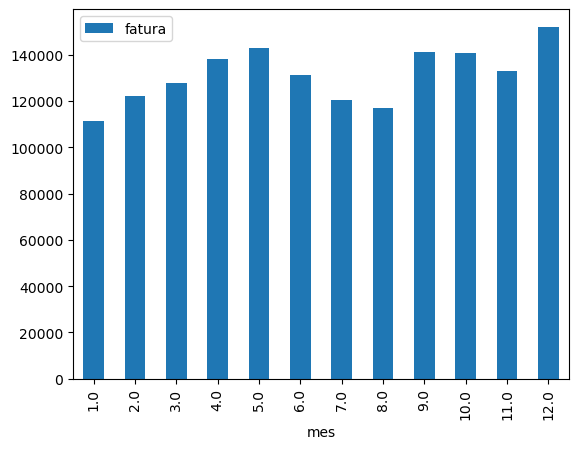

In [76]:
# Para comparaçao visual, grafico de todas as vendas por mes
fatm3.plot(kind='bar', x='mes', y='fatura')

Categorias principais analisadas:
 ['OXH', 'FEW', 'N8U', '6BZ', 'SJS', '9ZX', 'P42', 'LPF', 'XG4', 'FU5', '0H2', '29A', 'R6E', 'JI5', 'U5F', 'Q4N', '01F', 'IEV', '1EO', 'H8O', '8HU']
Categorias comentadas acima:
 ['FEW', 'SJS', '9ZX', 'P42', '0H2', 'JI5']


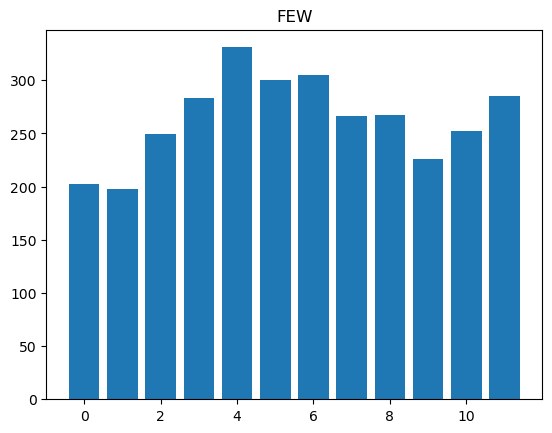

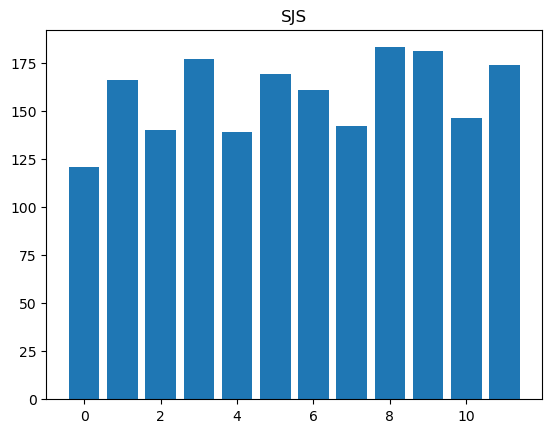

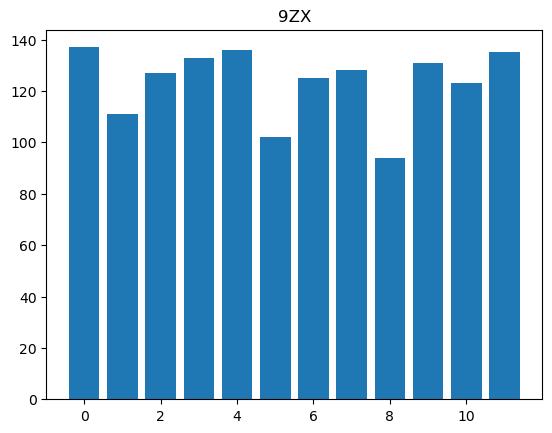

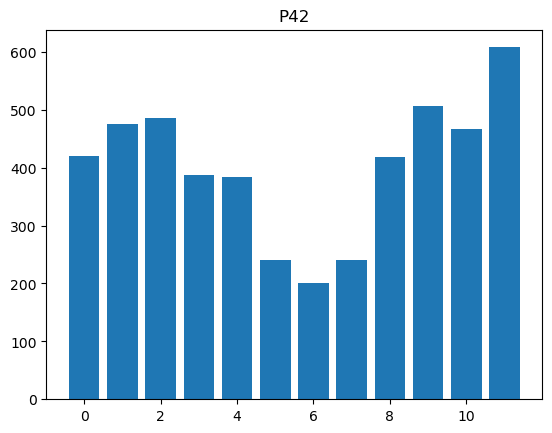

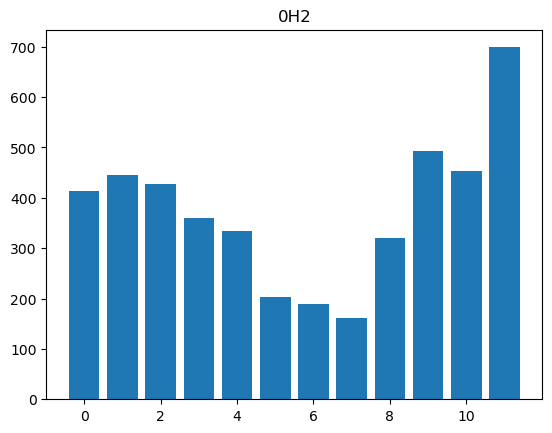

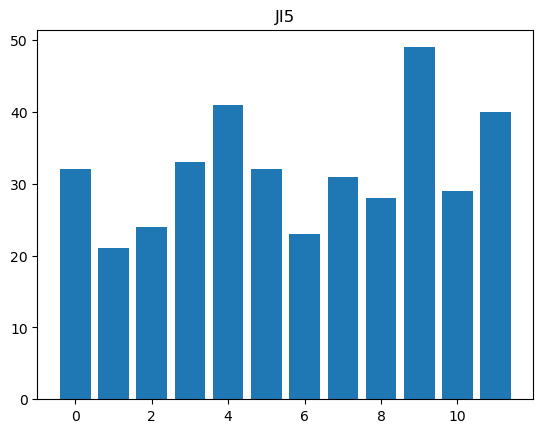

In [90]:
# 1.1 Lembrando que nao se tem informaçoes sobre o que realmente sao as categorias dos produtos nem estoque etc, logo fica mais
# ... dificil fazer entender os motivos da sazonalidade
# 1.2 Apos plotar o grafico e perceber que a maioria segue a mesma tendencia geral da loja, escolhi algumas categorias que tem
# ... sua seasonalidade diferente do habitual para dar enfoque, para visualizar todas, basta trocar na linha do for
# ... 'seasonalidade_interessante' por 'lista_categorias'
# 1.3 Graficos estao plotados abaixo
# 2.1 FEW - É muito similar a seasonalidade geral, porem tem uma acentuaçao notavel no mes de maio e ao redor, e mais estavel
# ... nas extremidades do ano comparado ao normal
# 2.2 SJS - Com certeza essa categoria precisa de mais informaçoes para entende-la, suas ascençoes e quedas quase se invertem  
# ... todo mes, me deixa muitissimo curioso para entende-la se é que tem boa explicaçao, porem me conterei a comentar que
# ... é uma seasonalidade anormal relativamente estavel meio ao caos, e uma leve tendencia do caos ter numeros brutos
# ... maiores no fim do ano. Uma categoria com variedade de preço de seus produtos, mas que receita principalmente de produtos
# ... nao baratos (>40), sugere eventos.
# 2.3 9ZX - Em fevereiro, junho e setembro essa categoria cai em vendas, se recupera e mantem ate esses meses, claro que para
# ... afirmar isso seria necessario dados de mais anos, estoque, saber tipo do produto etc. Mas é sua tendencia nesse ano
# 2.4 P42 - Esse é interessante e 'facil' de entender ele tem uma queda brusca nos meses centrais do ano, cresce em volta e tem
# ... seu auge em dezembro, que *deve* estar relacionado ao clima, como nao sabemos em qual hemisferio essa loja esta, é dificil
# ... de dizer qual. Importante comentar que por mais que a loja tenha seu pico maximo daquele ano em dezembro, pode significar
# ... alem do pico sazonal de que existe um crescimento da loja como um todo junto
# 2.5 0H2 - Possui uma onda similar com a P42 entao suas vendas ser mais procuradas por causa do clima, mas tem dezembro
# ... ainda mais acentuado, o que pode ou nao significar uma forte correlaçao com festividade de fim de ano
# 2.6 JI5 - Possui curiosos picos durante epocas de transiçao de clima, assim como na extrema ponta do ano, com seu auge em
# ... outubro, tipo de produto, estoque podem ser fatores que expliquem essa diferença, nao acho impossivel ser atrelado a
# ... festividades tambem, porem seu preço medio que é baixo(<10 - media), e larga escala de compra para loja me deixa
# ... cetico que seja o caso
print('Categorias principais analisadas:\n',lista_categorias)
seasonalidade_interessante = ['FEW', 'SJS', '9ZX', 'P42', '0H2', 'JI5']
print('Categorias comentadas acima:\n',seasonalidade_interessante)
for i in seasonalidade_interessante:
    meses = [0,0,0,0,0,0,0,0,0,0,0,0]
    for a in transfers[transfers.SKU_Category == i].iterrows():
        meses[a[1].Date.month - 1] += 1
    plt.bar(range(12), meses)
    plt.title(i)
    plt.show()

# 1.3 Recorrencia de clientes

## 1.3.1 Distrubuiçao por mes de clientes

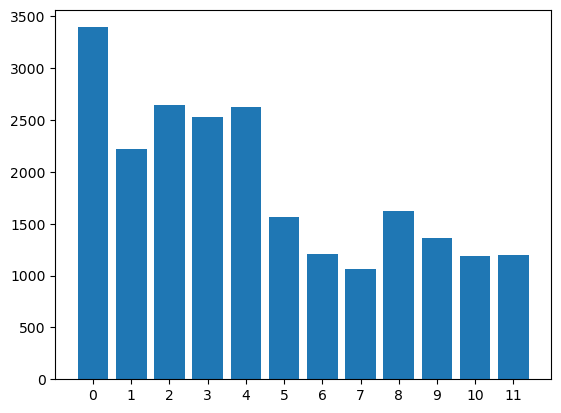

In [304]:
# Clientes novos por mes | 0 - janeiro | 11 - dezembro
mes_a = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in users.iterrows():
    mes_a[int(i[1].First_Order_Date[5:7])-1] += 1
plt.bar(range(12), mes_a)
plt.xticks(range(0,12))
plt.show()

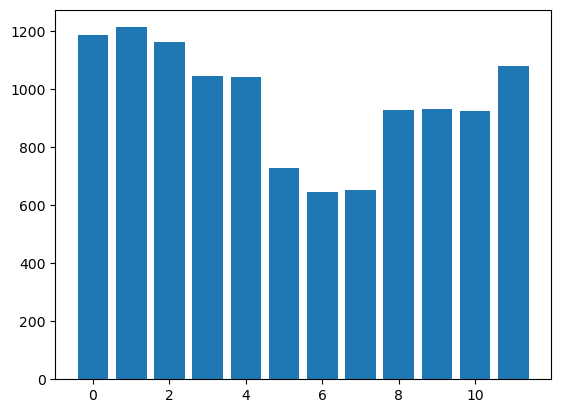

In [288]:
# 1.1 Clientes perdidos por mes, nota-se que quanto mais perto do fim do ano mais chance da pessoa nao comprar novamente por que 
# ... acabaram se os dados | 0 - janeiro | 11 - dezembro
mes_b = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in users[users["Total_Transactions"] == 1].iterrows():
    mes_b[int(i[1].Last_Order_Date[5:7])-1] += 1
plt.bar(range(12), mes_b)
plt.show()

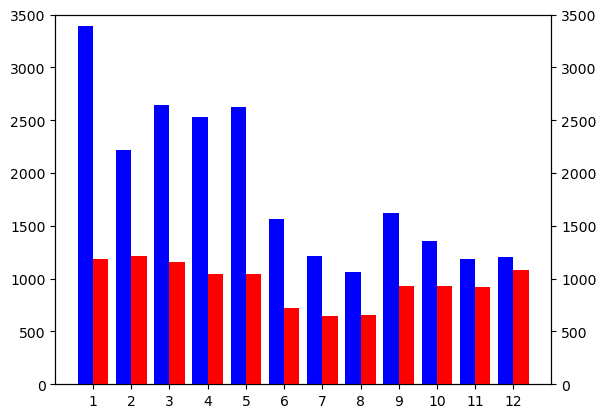

In [306]:
# Em azul novos clientes, em vermelho os mesmos clientes que nao voltaram a fazer compras na loja
ind = np.arange(len(mes_a))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(ind+0.8, mes_a, 0.4, color='blue')
plt.ylim(0, 3500)

ax2 = ax.twinx()

ax2.bar(ind+1.2, mes_b, 0.4, color='red')
plt.ylim(0, 3500)

plt.xticks(range(1,13))
plt.show()

## 1.4 Categorias para clientes

## 1.4.1 Clientes nichados por categoria

In [366]:
# 1.1 Como foi utilizada apenas as categorias mais populares, nao aconteceu do produto ser excessivamente comprado por poucas
# ... pessoas em relaçao a todas as vendas
# 1.2 A categoria mais expressiva, continua nao sendo nada expressiva(*dentre as populares), que é a U5F que os clientes 
# ... tendem a comprar 2.5x produtos daquela categoria, tendo 22 clientes que de todas suas compras pelo menos metade delas
# ... foram da categoria em questao
print(lista_categorias) # Categorias analisadas(principais, citadas ao longo do notebook)
possiveis_nichos = ['U5F', 'N8U', 'P42'] # Categorias que se destacaram dentre as analisadas
print(possiveis_nichos)
for i in possiveis_nichos:
    print('---\n',i, "\n")
    gq = transfers.groupby('SKU_Category').get_group(i)
    print('Transaçoes feitas do produto:', gq.shape[0])
    print('Pessoas fizeram essas transaçoes:', len(gq.Customer_ID.unique()), '\n')
    gqc = gq.groupby("Customer_ID")
    groups_rec = []
    for a in gqc:
        if a[1].shape[0] > 5:
            groups_rec.append(a[0])
    count = 0
    for a in groups_rec:
        for b in users.groupby("Customer_ID").get_group(a).SKU_Category:
            if (sum(eval(b).values()) - eval(b).get(i)) < (sum(eval(b).values())/10)*5:
                count +=1
                #print(sum(eval(b).values()))
                #print(eval(b).get(i))
    print("Pessoas que de todas as compras, compram mais de 50% dos produtos daquela categoria:", count)

['OXH', 'FEW', 'N8U', '6BZ', 'SJS', '9ZX', 'P42', 'LPF', 'XG4', 'FU5', '0H2', '29A', 'R6E', 'JI5', 'U5F', 'Q4N', '01F', 'IEV', '1EO', 'H8O', '8HU']
['U5F', 'N8U', 'P42']
---
 U5F 

Transaçoes feitas do produto: 4570
Pessoas fizeram essas transaçoes: 2014 

Pessoas que de todas as compras, compram mais de 50% dos produtos daquela categoria: 22
---
 N8U 

Transaçoes feitas do produto: 10913
Pessoas fizeram essas transaçoes: 6201 

Pessoas que de todas as compras, compram mais de 50% dos produtos daquela categoria: 29
---
 P42 

Transaçoes feitas do produto: 4836
Pessoas fizeram essas transaçoes: 3248 

Pessoas que de todas as compras, compram mais de 50% dos produtos daquela categoria: 10
